<a href="https://colab.research.google.com/github/titli17/Car-Price-Prediction/blob/main/Final_Car_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                                                              # for making data frames(more structured tables)
import matplotlib.pyplot as plt                                                  # for plotting purposes
import seaborn as sns                                                            # for data visualisation
import numpy as np                                                               # for working with arrays
from sklearn.model_selection import train_test_split                             # for splitting our data into training and testing set
from sklearn.linear_model import LinearRegression                                # for training it on the training set
from sklearn import metrics                                                      # for error estimation and performance
from sklearn.metrics import mean_squared_error

LOADING THE CSV FILE :

In [ ]:
car=pd.read_csv('/content/car_data.csv')                                         # loading the csv file (comma separated value file,
                                                                                 # which allows data to be saved in a tabular form) to the data frame using pandas

In [ ]:
car.head()                                                                       # prints the first 5 rows of the data set

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car.shape                                                                        # prints the (no. of rows, no. of columns)

(4340, 8)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
# for checking the distribution of the various categories or the features :
print(car.fuel.value_counts(),"\n")
print(car.seller_type.value_counts(),"\n")
print(car.transmission.value_counts(),"\n")
print(car.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64 

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64 

Manual       3892
Automatic     448
Name: transmission, dtype: int64 

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


DATA VISUALIZATION :

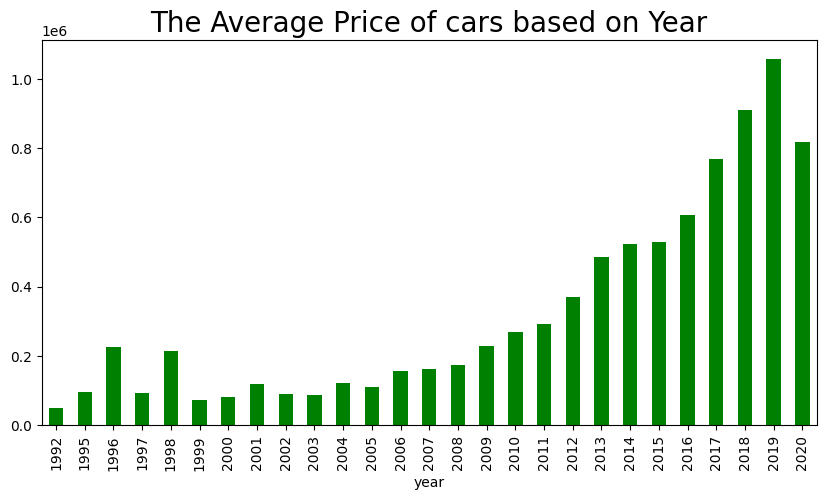

In [ ]:
plt.figure(figsize = (10, 5))
car.groupby('year')['selling_price'].mean().plot(kind = 'bar', color = 'g')         # INSIGHT : We see that as the years progress, there is a steady average increase
plt.title("The Average Price of cars based on Year", fontsize = 20)                 #           in the prices of cars from our data respectively.
plt.show()

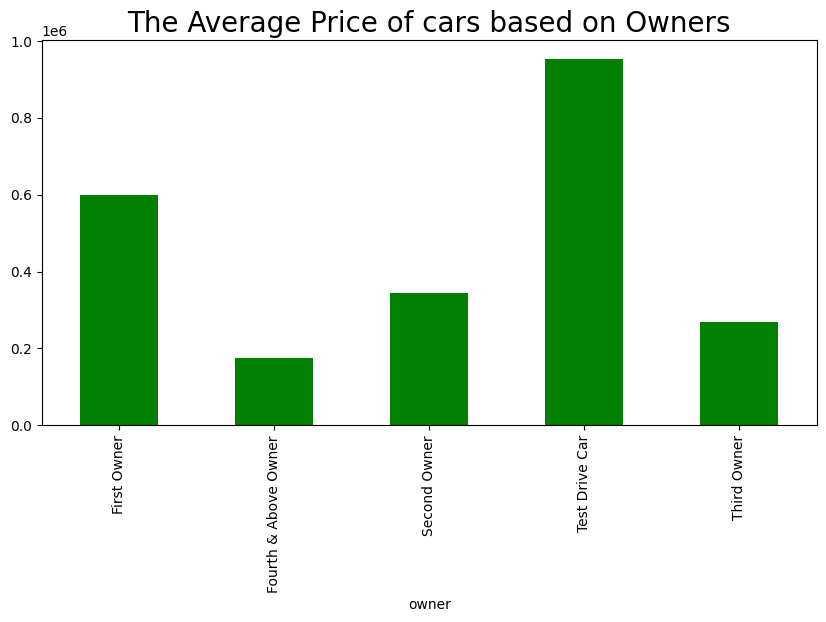

In [ ]:
plt.figure(figsize = (10, 5))
car.groupby('owner')['selling_price'].mean().plot(kind = 'bar', color = 'g')      # INSIGHT : Test drive cars have the maximum selling price.
plt.title("The Average Price of cars based on Owners", fontsize = 20)
plt.show()

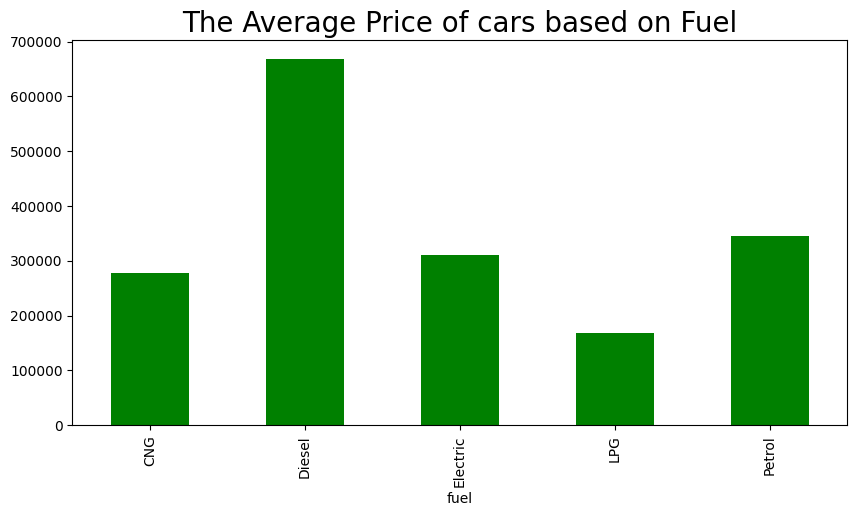

In [ ]:
plt.figure(figsize = (10, 5))
car.groupby('fuel')['selling_price'].mean().plot(kind = 'bar', color = 'g')       # INSIGHT : Diesel based cars have maximum selling price.
plt.title("The Average Price of cars based on Fuel", fontsize = 20)
plt.show()

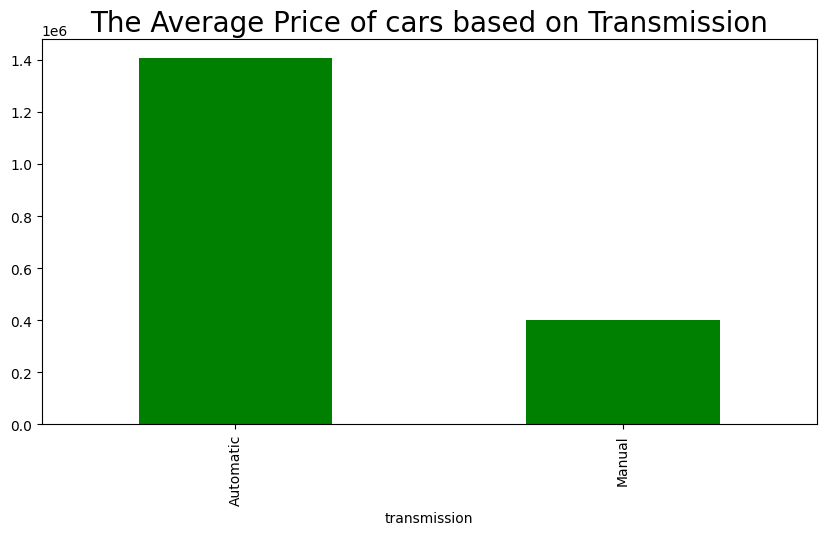

In [ ]:
plt.figure(figsize = (10, 5))
car.groupby('transmission')['selling_price'].mean().plot(kind = 'bar', color = 'g')           # INSIGHT : Automactic cars are expensive.
plt.title("The Average Price of cars based on Transmission", fontsize = 20)
plt.show()

DATA PREPROCESSING :

In [ ]:
#Encoding the Categorical Data :

#encoding the fuel:---
car.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

#encoding the seller_type:---
car.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

#encoding the transmission:---
car.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

#incoding the owner:---
car.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   int64 
 5   seller_type    4340 non-null   int64 
 6   transmission   4340 non-null   int64 
 7   owner          4340 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 271.4+ KB


In [ ]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


CORRELATIONAL ANALYSIS :

In [ ]:
corrcoefficient = np.corrcoef(car.selling_price,car.year)
print("Correlation Coefficient : ",corrcoefficient[0,1])                         # Year is positively correlated to selling price (as year increases, selling price also increases)

Correlation Coefficient :  0.4139216798108551


In [ ]:
corrcoefficient = np.corrcoef(car.selling_price,car.km_driven)
print("Correlation Coefficient : ",corrcoefficient[0,1])                         # Km_driven is negatively correlated to selling price (as km_driven increases, price of car decreases)

Correlation Coefficient :  -0.19228863054511436


In [ ]:
corrcoefficient = np.corrcoef(car.selling_price,car.seller_type)
print("Correlation Coefficient : ",corrcoefficient[0,1])

Correlation Coefficient :  0.24066617763611692


In [ ]:
corrcoefficient = np.corrcoef(car.selling_price,car.transmission)
print("Correlation Coefficient : ",corrcoefficient[0,1])

Correlation Coefficient :  0.5302051397294352


In [ ]:
corrcoefficient = np.corrcoef(car.selling_price,car.owner)
print("Correlation Coefficient : ",corrcoefficient[0,1])

Correlation Coefficient :  -0.19883272024762808


IDENTIFYING AND STORING TARGET VARIABLE AND FEATURES SEPARATELY :

In [ ]:
X=car.drop(['name','selling_price'],axis=1)                                      # X stores the features              when we drop the rows: axis=1 ....drop columns: axis=0
Y=car['selling_price']                                                           # Y stores the target variable

print(X,"\n")
print(Y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns] 

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


SPLITTING DATA SET INTO TRAINING DATA SET AND TEST DATA SET :

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)               #test_size=0.1 means 10%  i.e. 90% data is training data & 10% is testing data
                                                                                                 #X-test & Y_test contains the selling_price of their respective training data set

MODEL BUILDING :

Linear Regression Model :

In [ ]:
#loading the linear regression model :   (linear regression works better on features and target data which are directly proportional to each other)
model=LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# prediction on test data
test_data_prediction=model.predict(X_test)

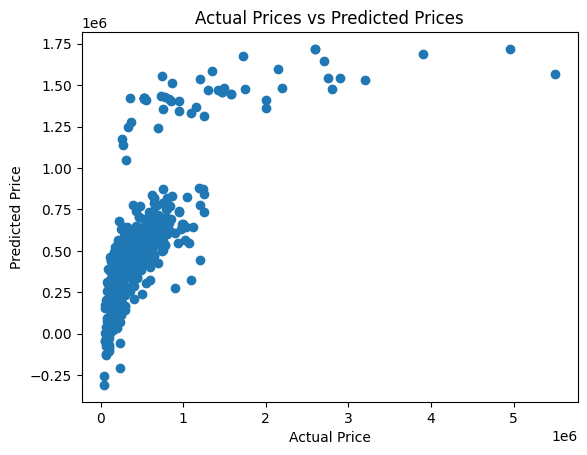

In [ ]:
# Graph plotting for test data
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)                        # R squared error (tells how close the data points are to the regression line)
print("R squared error : ",error_score)
error_mean_square=mean_squared_error(Y_test,test_data_prediction)
print("\nMean Square Error : ",error_mean_square)